<a href="https://colab.research.google.com/github/ljzier/ST-554-repo/blob/main/ST_554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

This data has many categorical variables and a few numeric. You should add the following:

**Categorical variables**

• Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for
the plots.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in student data
stud_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep=";")
stud_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



**Numeric variables (and across groups)**

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

• Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the
categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles.

• Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by
a categorical variable in each. Add appropriate labels and titles.

**After each summary or graph, you should discuss what is interesting about it or what it tells
you!**


/tmp/ipython-input-1000724973.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table[index]
/tmp/ipython-input-1000724973.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(x=stud_data.studytimeC.cat.categories, height=table[index])


<BarContainer object of 4 artists>

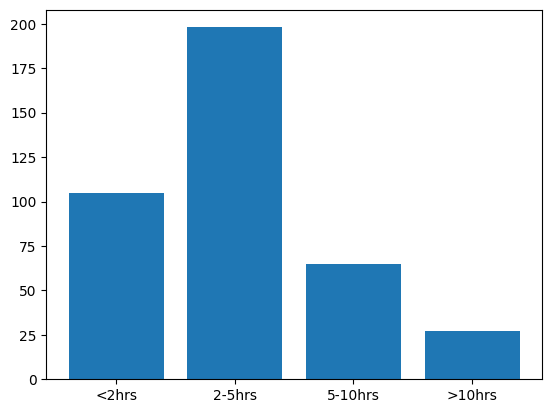

In [42]:
# sex is first categorical data
stud_data["sexC"]=stud_data.sex.astype("category")
stud_data.sexC = stud_data.sexC.cat.rename_categories(["Female", "Male"])
#stud_data.sexC.value_counts()

# studytime is second categorical data
stud_data["studytimeC"]=stud_data.studytime.astype("category")
stud_data.studytimeC = stud_data.studytimeC.cat.rename_categories(["<2hrs", "2-5hrs", "5-10hrs", ">10hrs"])

# Ptatus is third categorical data
stud_data["PstatusC"]=stud_data.Pstatus.astype("category")
stud_data.PstatusC = stud_data.PstatusC.cat.rename_categories(["Together", "Apart"])
#stud_data.PstatusC.value_counts()

# going to do a bar chart of studytime
print(stud_data.studytimeC.cat.categories)
# checking ordering
table = stud_data.studytimeC.value_counts()
print(table)

# Reorder from smallest hours of studying to largest
index = [1, 0, 2, 3]
table[index]

# bar chart of hours of studying
plt.bar(x=stud_data.studytimeC.cat.categories, height=table[index])
plt.xlabel("# hours of studying")
plt.ylabel("Number of Students")
plt.title("Student StudyTime by category")


In [28]:
# creating a 2-way contingency table with sex and hours studying
pd.crosstab(
    stud_data.sexC,
    stud_data.studytimeC,
    margins=True
)

studytimeC,<2hrs,2-5hrs,5-10hrs,>10hrs,All
sexC,,,,,
Female,27,113,51,17,208
Male,78,85,14,10,187
All,105,198,65,27,395


In [29]:
# creating a 3-way contingency table with sex and hours studying and parental status
my_tab = pd.crosstab(
    [stud_data.sexC,
    stud_data.studytimeC],
    stud_data.PstatusC,
    rownames=["Sex", "Study Time"],
    colnames=["Parent status:"]
)
my_tab

Parent status:     Together  Apart
Sex    Study Time                 
Female <2hrs              3     24
       2-5hrs            17     96
       5-10hrs            2     49
       >10hrs             1     16
Male   <2hrs              6     72
       2-5hrs             9     76
       5-10hrs            2     12
       >10hrs             1      9

Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way table. Do this using two different methods:

– Once, by subsetting the data (say with .loc) and then creating the two-way table

– Once, by creating a three-way table and subsetting it

In [ ]:
# subsetting the data using .loc and creating a 2-way table
stud_data.loc[stud_data["sexC"] == "Female",["studytimeC", "PstatusC"]]


,studytimeC,PstatusC
0,2-5hrs,Together
1,2-5hrs,Apart
2,2-5hrs,Apart
3,5-10hrs,Apart
4,2-5hrs,Apart
...,...,...
385,5-10hrs,Apart
386,<2hrs,Apart
387,5-10hrs,Apart
388,2-5hrs,Apart


In [ ]:
# create a 3-way table
three_way = pd.crosstab(
    index=stud_data['studytimeC'],
    columns=[stud_data['sexC'], stud_data['PstatusC']], # Added a comma here
    rownames = ["Study Time"],
    colnames = ["Sex", "Parent Status"]
)

# subsetting a 3-way table
three_way['Female']

Parent Status,Together,Apart
Study Time,,
<2hrs,3,24
2-5hrs,17,96
5-10hrs,2,49
>10hrs,1,16


**Numeric variables (and across groups)**

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

• Find measures of center and spread for three of these variables (including G3 as one of them)


In [ ]:
# full suite of measurements
stud_data[["age", "absences", "G3"]].describe()

stud_data[["age", "absences", "G3"]].describe().loc[["mean", "std"]]

,age,absences,G3
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443



– Repeat while subsetting the data by some grouping variable (say with .loc)


In [ ]:
# subsetting on those that want to go to college
stud_data.loc[stud_data['higher'] =="yes", ['age', 'absences','G3']].describe().loc[['mean', 'std']]

# subsetting on those that don't want to go to college (just curious)
stud_data.loc[stud_data['higher'] =="no", ['age', 'absences','G3']].describe().loc[['mean', 'std']]

,age,absences,G3
mean,17.850000,7.650000,6.800000
std,1.348488,16.971416,4.829732



• Find measures of center and spread across a single grouping variable for three of these variables (including G3 as one of them)


In [ ]:
# grouping by sex and getting mean and std of G3, age, and abscences
stud_data.groupby("sexC")[["G3", "age", "absences"]].agg(['mean', 'std'])

/tmp/ipython-input-1846845788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stud_data.groupby("sexC")[["G3", "age", "absences"]].agg(['mean', 'std'])


G3                  age            absences          
             mean       std       mean       std      mean       std
sexC                                                                
Female   9.966346  4.622338  16.730769  1.201696  6.216346  9.445819
Male    10.914439  4.495297  16.657754  1.356181  5.144385  5.980749


• Find measures of center and spread across two grouping variables for three of these variables (including
G3 as one of them)

In [ ]:
# grouping by sex and study time and getting mean and std of G3, age, and abscences
stud_data.groupby(["sexC", "studytimeC"])[["G3", "age", "absences"]].agg(['mean', 'std'])

/tmp/ipython-input-2295048755.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stud_data.groupby(["sexC", "studytimeC"])[["G3", "age", "absences"]].agg(['mean', 'std'])


G3                  age            absences  \
                        mean       std       mean       std      mean   
sexC   studytimeC                                                       
Female <2hrs        9.851852  4.833407  16.259259  0.984206  6.962963   
       2-5hrs       9.495575  4.348899  16.734513  1.180328  6.955752   
       5-10hrs     10.725490  4.808652  16.960784  1.280012  4.764706   
       >10hrs      11.000000  5.408327  16.764706  1.300452  4.470588   
Male   <2hrs       10.115385  5.027149  16.782051  1.447321  5.346154   
       2-5hrs      11.070588  3.881544  16.658824  1.268228  5.376471   
       5-10hrs     13.857143  2.957575  16.785714  1.311404  3.714286   
       >10hrs      11.700000  5.313505  15.500000  0.971825  3.600000   

                              
                         std  
sexC   studytimeC             
Female <2hrs        6.975129  
       2-5hrs      11.225282  
       5-10hrs      7.201634  
       >10hrs       4.048420  
Male   <2hrs        7.006170  
       2-5hrs       5.524785  
       5-10hrs      3.625308  
       >10hrs       2.951459

* Create a correlation matrix between all of the numeric
variables

In [ ]:
# Correlation matrix
stud_data[["age", "absences", "G1", "G2", "G3"]].corr()


,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


In [ ]:
# File → Download → Download .ipynb